### Unit 3 - In-class exercise

#### Clinical Trial Simulation

Suppose that a clinical trial to test a new drug will be conducted on 8 patients, in which the probability of a good response to the drug is thought to be 0.15. The following code tabulates and graphs the distribution of the number of good responses based on 1,000 replicates of the trial for 8 patients.

response.counts,n
0,264
1,410
2,247
3,66
4,12
5,1


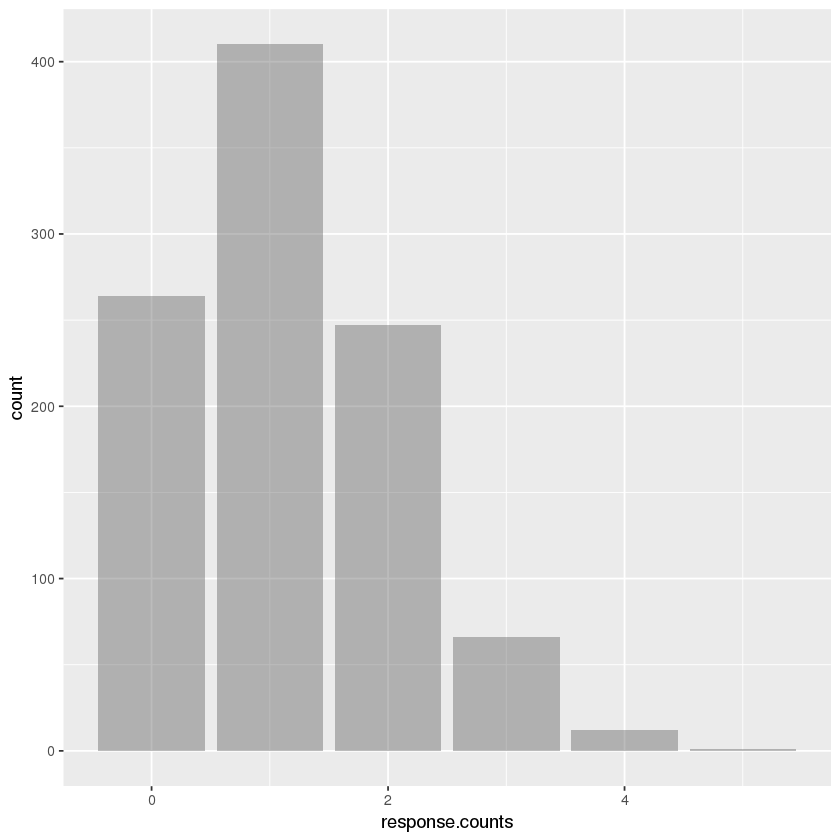

In [9]:
#load necessary packaages
require(mosaic)
require(dplyr)
require(ggplot2)

#set the parameters
number.patients = 8
response.prob = 0.15
number.replicates = 1000

#set the seed
set.seed(2018)

#run the simulation
number.responses.replicate <- do(number.replicates)*{
    number.responses = sample(c(0,1), size = number.patients, replace = TRUE,
             prob = c(1 - response.prob, response.prob))
    data.frame(response.counts=sum(number.responses))
}

#create a table of response counts
number.responses.replicate %>%
    count(response.counts)

#plot the response counts
ggplot(data=number.responses.replicate,aes(response.counts)) +
    geom_bar(alpha=.4)

a) Run the code. From the barplot, describe the distribution.

**Solution:**

The distribution is right-skewed; there are very few replicates where more than 3 patients respond well to the drug. In most of the replicates, 1 patient out of 8 responds well.

b) Based on the results of the simulation, estimate the probability that 0 patients respond well to the new drug.

#### Solution:

The probability that 0 patients respond well is $264/1000 = 0.264$.


c) Based on the results of the simulation, construct a probability distribution for the random variable $X$, the number of patients who respond well to the experimental drug.

#### Solution:

In [16]:
number.responses.replicate %>%
  group_by(response.counts) %>%
  summarise (n = n()) %>%
  mutate(freq = n / sum(n))

response.counts,n,freq
0,264,0.264
1,410,0.410
2,247,0.247
3,66,0.066
4,12,0.012
5,1,0.001


|||||||||||||
|:---:|-|-|-|-|-|-|-|-|-|-|-|
|$x_i$ | 0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  Total | 
|$P(X = x_i)$ |  0.264 |  0.410 |  0.247 |  0.066 |  0.012 |  0.001 |  0 |  0 |  0 |  = 1.00| 


d) What value(s) for response probability would produce a left-skewed distribution? what value(s) would produce a symmetric distribution?


#### Solution:

Consider the following two examples in which we change the response probabilities to 0.85 and 0.80.

response.counts,n
3,1
4,12
5,66
6,247
7,410
8,264


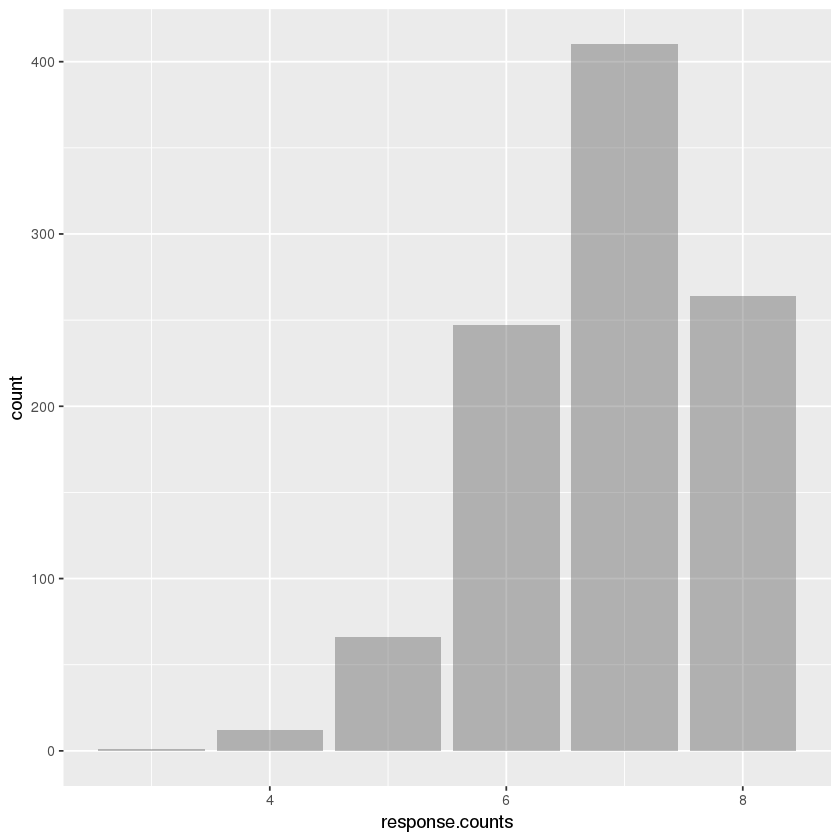

In [17]:
#set the parameters
number.patients = 8
response.prob = 0.85
number.replicates = 1000

#set the seed
set.seed(2018)

#run the simulation
number.responses.replicate <- do(number.replicates)*{
    number.responses = sample(c(0,1), size = number.patients, replace = TRUE,
             prob = c(1 - response.prob, response.prob))
    data.frame(response.counts=sum(number.responses))
}

#create a table of response counts
number.responses.replicate %>%
    count(response.counts)

#plot the response counts
ggplot(data=number.responses.replicate,aes(response.counts)) +
    geom_bar(alpha=.4)

response.counts,n
0,2
1,30
2,100
3,207
4,272
5,234
6,121
7,30
8,4


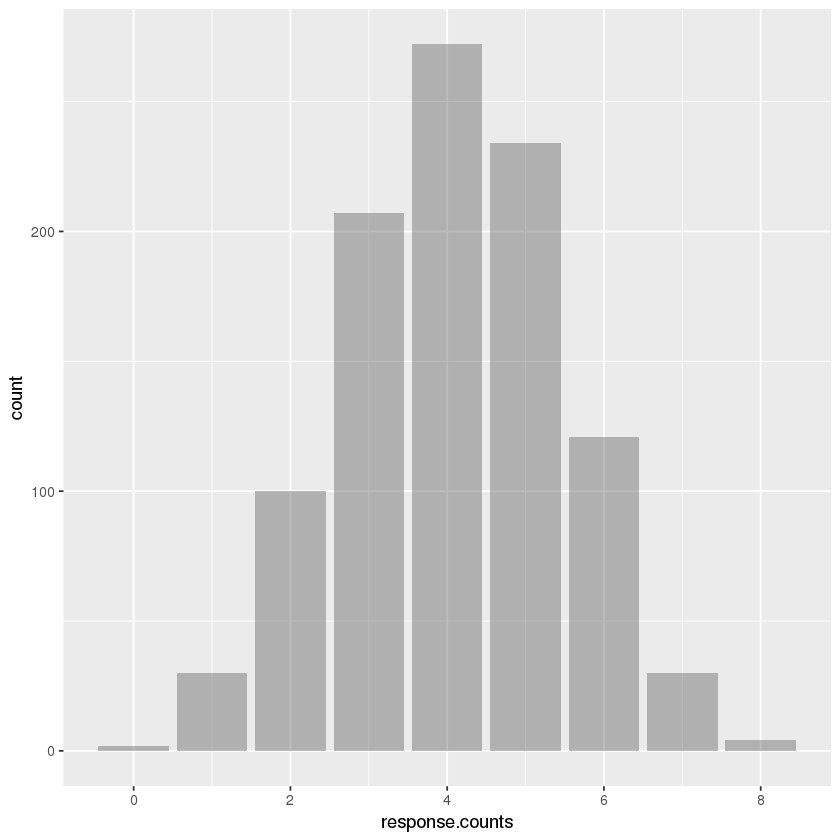

In [18]:
#set the parameters
number.patients = 8
response.prob = 0.50
number.replicates = 1000

#set the seed
set.seed(2018)

#run the simulation
number.responses.replicate <- do(number.replicates)*{
    number.responses = sample(c(0,1), size = number.patients, replace = TRUE,
             prob = c(1 - response.prob, response.prob))
    data.frame(response.counts=sum(number.responses))
}

#create a table of response counts
number.responses.replicate %>%
    count(response.counts)

#plot the response counts
ggplot(data=number.responses.replicate,aes(response.counts)) +
    geom_bar(alpha=.4)

A response probability close to 1, such as 0.85, produces a left-skewed distribution; in this case, we would expect almost all of the 8 patients in a trial to respond well to the drug. 

A response probability near 0.5 produces a symmetric graph. In this case, we would typically expect half the patients out of 8 to respond well to the drug.

e) Calculate $E(X)$, where $X$ is the number of patients who respond well to the experimental drug.

#### Solution:

  
\begin{align*}
E(X) 	&= \sum_{i=1}^{k}x_iP(X=x_i) \notag \\
	&= (x_1)P(X = x_1) + (x_2)P(X = x_2) + \cdots + (x_k)P(X = x_k) \\
	&= (0)(0.264) + (1)(0.410) + (2)(0.247) + (3)(0.066) \\
	& \qquad + (4)(0.012) + (5)(0.001) + (6)(0) + (7)(0) + (8)(0) \\
	&= 1.155
\end{align*}


f) Calculate $SD(X)$, where $X$ is the number of patients who respond well to the experimental drug. It is sufficient to write the answer in an unsimplified form where only simple arithmetic is necessary to reach the final value.

#### Solution:

\begin{align*}
Var(X) 	&= \sum_{j=1}^{k} (x_j - \mu)^2 P(X=x_j) \\
  &= (x_1-\mu)^2 P(X=x_1) + \cdots+ (x_k-\mu)^2 P(X=x_k) \\
	&= (0 - 1.155)^{2}(0.264) + (1 - 1.155)^{2}(0.410) + (2 - 1.155)^{2}(0.247) + (3 - 1.155)^{2}(0.066) \\
	  & \qquad + (4 - 1.155)^{2}(0.012) + (5 - 1.155)^{2}(0.001) + (6 - 1.155)^{2}(0) + (7 - 1.155)^{2}(0) \\
	  & \qquad (8 - 1.155)^{2}(0) \\
	&= 0.875
\end{align*}

$SD(X) = \sqrt{Var(X)} = 0.935$.